In [7]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

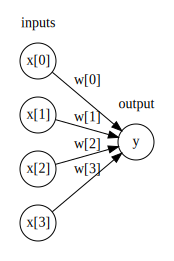

In [3]:
mglearn.plots.plot_logistic_regression_graph()

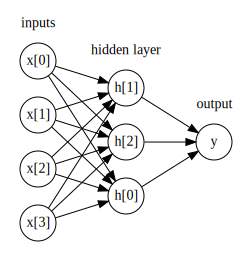

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

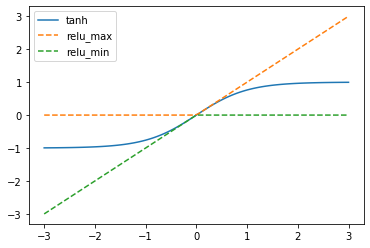

In [33]:
line=np.linspace(-3,3,100)
pl.plot(line,np.tanh(line),label='tanh')
pl.plot(line,np.maximum(line,0),label='relu_max',linestyle='--')
pl.plot(line,np.minimum(line,0),label='relu_min',linestyle='--')
pl.legend()

In [19]:
np.maximum([-1,-2,3],0)

array([0, 0, 3])

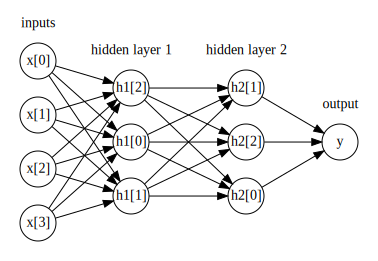

In [34]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

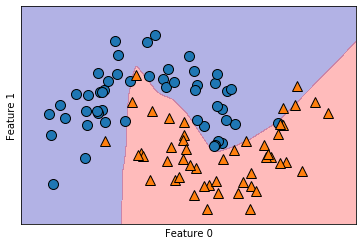

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                    random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

In [68]:
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.9866666666666667, 0.88)

Text(0, 0.5, 'Feature 1')

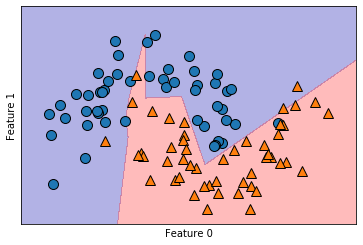

In [71]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=10).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

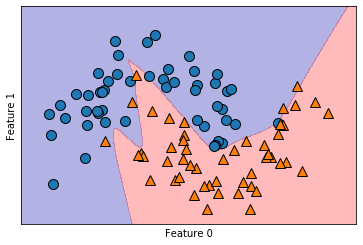

In [76]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh',
    random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

In [77]:
mlp.score(X_train,y_train),mlp.score(X_test,y_test)

(0.9866666666666667, 0.84)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\rissu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


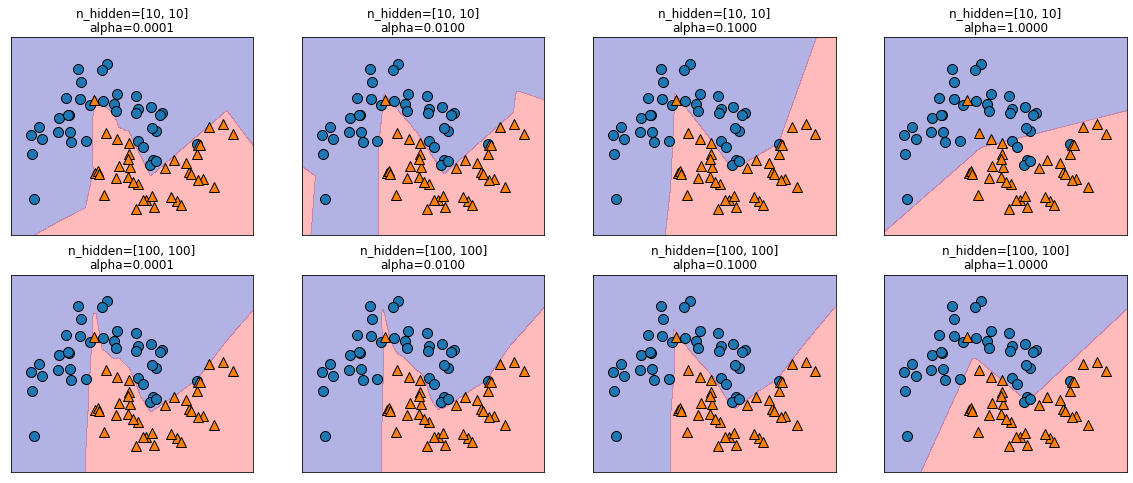

In [90]:
score=[]
fig,axes=pl.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                         alpha=alpha)
        mlp.fit(X_train,y_train)
        score.append([mlp.score(X_train,y_train),mlp.score(X_test,y_test)])
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=0.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [91]:
score

[[0.9866666666666667, 0.84],
 [0.9866666666666667, 0.88],
 [0.9866666666666667, 0.88],
 [0.88, 0.76],
 [0.9866666666666667, 0.88],
 [0.9866666666666667, 0.84],
 [0.9866666666666667, 0.84],
 [0.96, 0.84]]

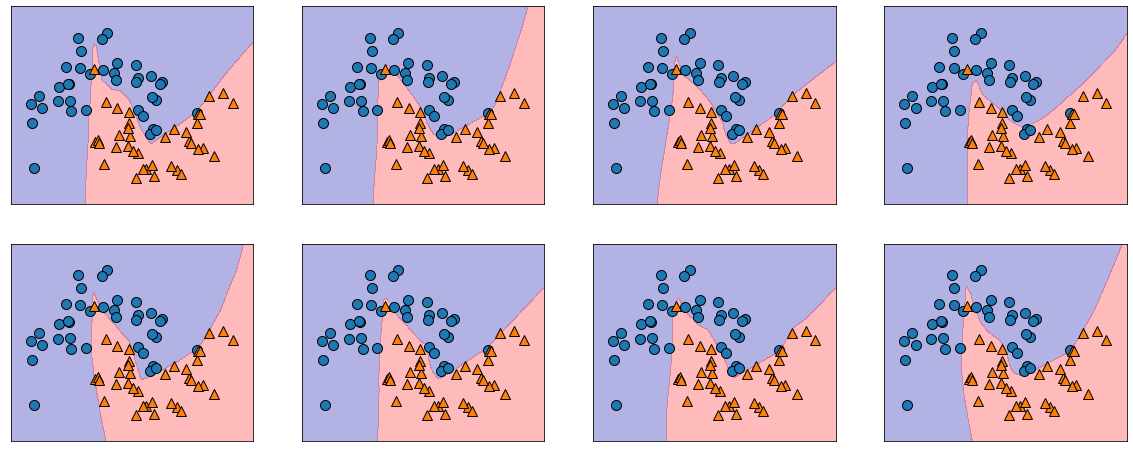

In [96]:
fig, axes = pl.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)